<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.234497,61.826805,51.637197,-10.255512,167.442986,178.629874,-11.186889
1,0.0,1.0,32.336680,53.435957,52.595927,15.737989,164.106554,150.770393,13.336161
2,0.0,2.0,53.537903,73.372301,89.777203,-23.081927,203.605480,227.032513,-23.427033
3,0.0,3.0,25.261124,53.139778,26.355606,25.139299,139.895807,117.757882,22.137925
4,0.0,4.0,92.370585,23.001003,40.921932,0.094235,166.387755,166.320397,0.067358
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.147349,82.334437,42.139397,-2.267174,227.354008,226.782367,0.571641
249996,999.0,246.0,41.145821,61.756726,41.489983,7.054658,161.447188,155.295797,6.151391
249997,999.0,247.0,87.558503,54.792547,97.629389,-18.785751,231.194687,246.538159,-15.343472
249998,999.0,248.0,47.191632,42.900847,90.073764,-9.859909,180.306334,189.659785,-9.353451


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.234497,61.826805,51.637197,-10.255512,167.442986,178.629874,-11.186889
1,0.0,1.0,32.336680,53.435957,52.595927,15.737989,164.106554,150.770393,13.336161
2,0.0,2.0,53.537903,73.372301,89.777203,-23.081927,203.605480,227.032513,-23.427033
3,0.0,3.0,25.261124,53.139778,26.355606,25.139299,139.895807,117.757882,22.137925
4,0.0,4.0,92.370585,23.001003,40.921932,0.094235,166.387755,166.320397,0.067358
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.147349,82.334437,42.139397,-2.267174,227.354008,226.782367,0.571641
249996,999.0,246.0,41.145821,61.756726,41.489983,7.054658,161.447188,155.295797,6.151391
249997,999.0,247.0,87.558503,54.792547,97.629389,-18.785751,231.194687,246.538159,-15.343472
249998,999.0,248.0,47.191632,42.900847,90.073764,-9.859909,180.306334,189.659785,-9.353451


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    54.234497  61.826805  51.637197 -10.255512  167.442986   
      1.0    32.336680  53.435957  52.595927  15.737989  164.106554   
      2.0    53.537903  73.372301  89.777203 -23.081927  203.605480   
      3.0    25.261124  53.139778  26.355606  25.139299  139.895807   
      4.0    92.370585  23.001003  40.921932   0.094235  166.387755   
...                ...        ...        ...        ...         ...   
999.0 245.0  95.147349  82.334437  42.139397  -2.267174  227.354008   
      246.0  41.145821  61.756726  41.489983   7.054658  161.447188   
      247.0  87.558503  54.792547  97.629389 -18.785751  231.194687   
      248.0  47.191632  42.900847  90.073764  -9.859909  180.306334   
      249.0  28.610254  84.259493  60.711151   0.322775  183.903672   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.629874 -11.186889  
      1.0    150.770393  13.336161  
      2.0    227.032513 -23.427033  
      3.0    117.757882  22.137925  
      4.0    166.320397   0.067358  
...                 ...        ...  
999.0 245.0  226.782367   0.571641  
      246.0  155.295797   6.151391  
      247.0  246.538159 -15.343472  
      248.0  189.659785  -9.353451  
      249.0  184.444404  -0.540732  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    54.234497  61.826805  51.637197 -10.255512  167.442986   
      1.0    32.336680  53.435957  52.595927  15.737989  164.106554   
      2.0    53.537903  73.372301  89.777203 -23.081927  203.605480   
      3.0    25.261124  53.139778  26.355606  25.139299  139.895807   
      4.0    92.370585  23.001003  40.921932   0.094235  166.387755   
...                ...        ...        ...        ...         ...   
999.0 245.0  95.147349  82.334437  42.139397  -2.267174  227.354008   
      246.0  41.145821  61.756726  41.489983   7.054658  161.447188   
      247.0  87.558503  54.792547  97.629389 -18.785751  231.194687   
      248.0  47.191632  42.900847  90.073764  -9.859909  180.306334   
      249.0  28.610254  84.259493  60.711151   0.322775  183.903672   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.629874 -11.186889  
      1.0    150.770393  13.336161  
      2.0    227.032513 -23.427033  
      3.0    117.757882  22.137925  
      4.0    166.320397   0.067358  
...                 ...        ...  
999.0 245.0  226.782367   0.571641  
      246.0  155.295797   6.151391  
      247.0  246.538159 -15.343472  
      248.0  189.659785  -9.353451  
      249.0  184.444404  -0.540732  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.234497,61.826805,51.637197,-10.255512,167.442986,178.629874,-11.186889
1,0.0,1.0,32.336680,53.435957,52.595927,15.737989,164.106554,150.770393,13.336161
2,0.0,2.0,53.537903,73.372301,89.777203,-23.081927,203.605480,227.032513,-23.427033
3,0.0,3.0,25.261124,53.139778,26.355606,25.139299,139.895807,117.757882,22.137925
4,0.0,4.0,92.370585,23.001003,40.921932,0.094235,166.387755,166.320397,0.067358
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.147349,82.334437,42.139397,-2.267174,227.354008,226.782367,0.571641
249996,999.0,246.0,41.145821,61.756726,41.489983,7.054658,161.447188,155.295797,6.151391
249997,999.0,247.0,87.558503,54.792547,97.629389,-18.785751,231.194687,246.538159,-15.343472
249998,999.0,248.0,47.191632,42.900847,90.073764,-9.859909,180.306334,189.659785,-9.353451


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    54.234497  61.826805  51.637197 -10.255512  167.442986   
      1.0    32.336680  53.435957  52.595927  15.737989  164.106554   
      2.0    53.537903  73.372301  89.777203 -23.081927  203.605480   
      3.0    25.261124  53.139778  26.355606  25.139299  139.895807   
      4.0    92.370585  23.001003  40.921932   0.094235  166.387755   
...                ...        ...        ...        ...         ...   
999.0 245.0  95.147349  82.334437  42.139397  -2.267174  227.354008   
      246.0  41.145821  61.756726  41.489983   7.054658  161.447188   
      247.0  87.558503  54.792547  97.629389 -18.785751  231.194687   
      248.0  47.191632  42.900847  90.073764  -9.859909  180.306334   
      249.0  28.610254  84.259493  60.711151   0.322775  183.903672   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.629874 -11.186889  
      1.0    150.770393  13.336161  
      2.0    227.032513 -23.427033  
      3.0    117.757882  22.137925  
      4.0    166.320397   0.067358  
...                 ...        ...  
999.0 245.0  226.782367   0.571641  
      246.0  155.295797   6.151391  
      247.0  246.538159 -15.343472  
      248.0  189.659785  -9.353451  
      249.0  184.444404  -0.540732  

[250000 rows x 7 columns]

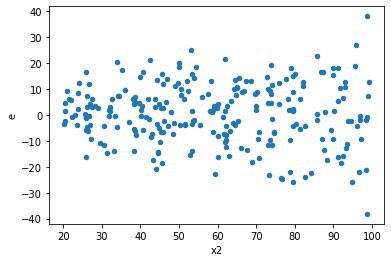

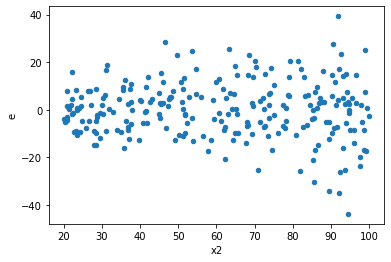

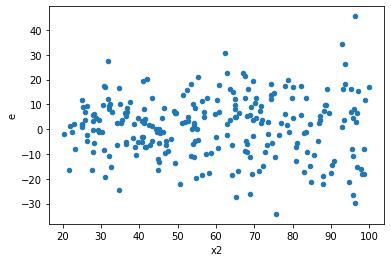

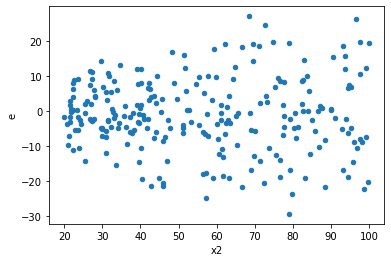

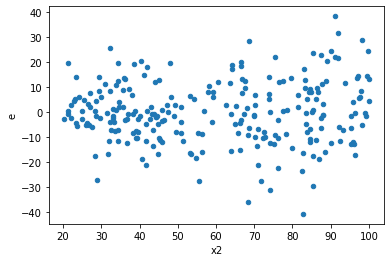

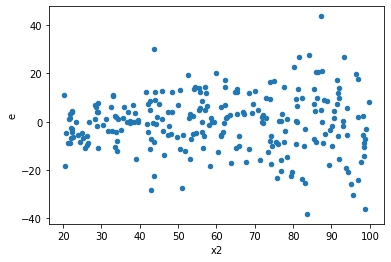

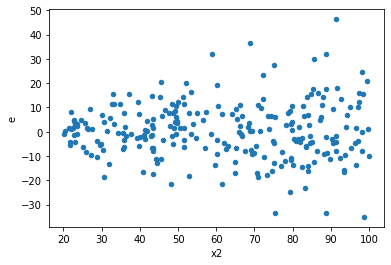

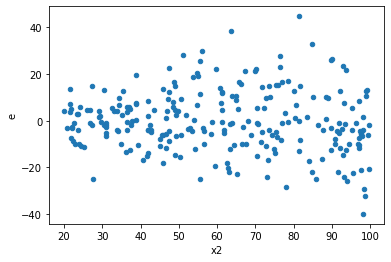

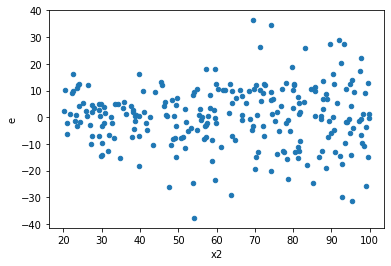

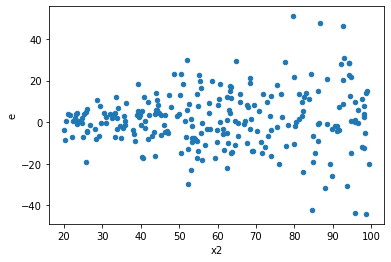

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,10331.334818743144,14361.47845783944,106.50860637879529,148.05647894679834,1.3900893456462948,0.1064949257361607,0.9467525371319196,0.05324746286808035,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,11516.195306428846,16971.613610528057,118.7236629528747,174.96508876833047,1.4737170705201357,0.05758863978013329,0.9712056801099334,0.028794319890066644,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,11605.491683885992,18948.23255516055,119.64424416377311,195.34260366144898,1.632695371405058,0.016573498880267268,0.9917132505598664,0.008286749440133634,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,8195.669126295286,12654.108760205345,84.49143429170398,130.45472948665304,1.5439994666946029,0.03356400484737798,0.983217997576311,0.01678200242368899,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,10945.058680877473,18092.825160919412,112.83565650389147,186.52397073112797,1.6530587627209414,0.014049210306849691,0.9929753948465752,0.0070246051534248455,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,9725.38053704518,16824.033294295095,100.26165502108432,173.4436422092278,1.7299100256499238,0.007462736549823212,0.9962686317250884,0.003731368274911606,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,12175.949258285,13653.605195747303,125.52525008541237,140.75881645100313,1.1213585820799021,0.5738137078895758,0.7130931460552121,0.2869068539447879,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,11127.53837105447,22838.295942468925,114.71689042324196,235.44634992236004,2.0524122389797443,0.0004744976899171416,0.9997627511550414,0.0002372488449585708,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,9653.771608232628,16120.45386998973,99.52341864157349,166.19024608236833,1.6698607056585413,0.012248767906424929,0.9938756160467875,0.006124383953212464,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,10331.334818743144,14361.47845783944,106.50860637879529,148.05647894679834,1.3900893456462948,0.1064949257361607,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,11516.195306428846,16971.613610528057,118.7236629528747,174.96508876833047,1.4737170705201357,0.05758863978013329,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,11605.491683885992,18948.23255516055,119.64424416377311,195.34260366144898,1.632695371405058,0.016573498880267268,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,8195.669126295286,12654.108760205345,84.49143429170398,130.45472948665304,1.5439994666946029,0.03356400484737798,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,10945.058680877473,18092.825160919412,112.83565650389147,186.52397073112797,1.6530587627209414,0.014049210306849691,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,9725.38053704518,16824.033294295095,100.26165502108432,173.4436422092278,1.7299100256499238,0.007462736549823212,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,12175.949258285,13653.605195747303,125.52525008541237,140.75881645100313,1.1213585820799021,0.5738137078895758,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,11127.53837105447,22838.295942468925,114.71689042324196,235.44634992236004,2.0524122389797443,0.0004744976899171416,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,9653.771608232628,16120.45386998973,99.52341864157349,166.19024608236833,1.6698607056585413,0.012248767906424929,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      521
Reject001=0 : Heteroscedasticity    479
Name: Result_test, dtype: int64